# Spacecraft data downloading

## Introduction

Here we demonstrate how to download spacecraft data using the *load_data* function of **AIDApy**. Three missions are currently implemented: Omniweb, Cluster and MMS

In [1]:
from datetime import datetime

#AIDApy Modules
from aidapy import load_data
import aidapy.aidaxr

## Omniweb data

First, we set up the parameters of the data: time interval and name of the mission. For this example, we will download from Omniweb all available data between May 15, 2008 and May 16, 2008, thus all other parameters are let to default values.

In [2]:
start_time_omni = datetime(2008, 5, 15, 0, 0, 0)
end_time_omni = datetime(2008, 5, 16, 0, 0, 0)

Once all the parameters have been set up, the *load_data* function can be called. The data are given in a **xarray.DataSet** format, which is an implementation of labeled and multi-dimensional arrays. A specific extension has been developed (aidapy.aidaxr) to provide specific pre and postprocessing of the data (see the statistical example). 

In [3]:
xr_omni = load_data(mission='omni', start_time=start_time_omni, end_time=end_time_omni)
xr_omni_all = xr_omni['all1']
print(xr_omni_all)

<xarray.DataArray 'all1' (time1: 23, products: 54)>
array([[ 2.38500000e+03,  5.10000000e+01,  5.20000000e+01, ...,
        -2.00000003e-01,  6.15399983e-03,  5.79999993e-03],
       [ 2.38500000e+03,  5.10000000e+01,  5.20000000e+01, ...,
        -3.00000012e-01,  6.15399983e-03,  7.49999983e-03],
       [ 2.38500000e+03,  5.10000000e+01,  5.20000000e+01, ...,
        -3.00000012e-01,  6.15399983e-03,  9.39999986e-03],
       ...,
       [ 2.38500000e+03,  5.10000000e+01,  5.20000000e+01, ...,
        -1.00000001e-01,  6.15399983e-03,  1.16999997e-02],
       [ 2.38500000e+03,  5.10000000e+01,  5.20000000e+01, ...,
         0.00000000e+00,  6.15399983e-03,  1.14000002e-02],
       [ 2.38500000e+03,  5.10000000e+01,  5.20000000e+01, ...,
         1.00000001e-01,  6.15399983e-03,  1.00999996e-02]])
Coordinates:
  * time1     (time1) datetime64[ns] 2008-05-15T01:00:00 ... 2008-05-15T23:00:00
  * products  (products) <U17 'Rot$' 'IMF' ... 'Solar_Lyman_alpha' 'Proton_QI'
Attributes:
    Un

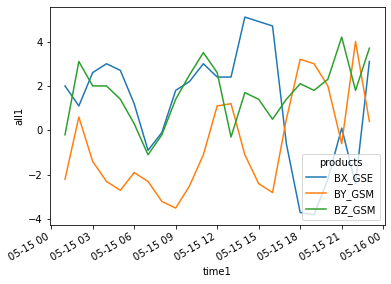

In [4]:
xr_omni_mag = xr_omni_all.sel(products=['BX_GSE', 'BY_GSM', 'BZ_GSM'])
xr_omni_mag.plot.line(x='time1')

## Cluster data

Then, data can be downloaded from cluster mission. As this mission has several spacecraft, the index of the spacecraft called probe must also be provided.
For this example, we will download the magnetic field during 5 minutes on August 5, 2013 for the probe 1 and 2 in GSE coordinate system.

In [5]:
start_time_cluster = datetime(2013, 8, 5, 0, 0, 0)
end_time_cluster = datetime(2013, 8, 5, 0, 5, 0)

settings_cluster = {'prod': ['dc_mag'], 'probes': ['1', '2'], 'coords': 'gse'}

In [6]:
xr_cluster = load_data('cluster', start_time_cluster, end_time_cluster, **settings_cluster)
print(xr_cluster)

<xarray.Dataset>
Dimensions:                        (B_vec_xyz_gse__C1_CP_FGM_SPIN: 3, B_vec_xyz_gse__C2_CP_FGM_SPIN: 3, time1: 71, time2: 72)
Coordinates:
  * B_vec_xyz_gse__C1_CP_FGM_SPIN  (B_vec_xyz_gse__C1_CP_FGM_SPIN) <U1 'x' .....
  * time1                          (time1) datetime64[ns] 2013-08-05T00:00:02...
  * B_vec_xyz_gse__C2_CP_FGM_SPIN  (B_vec_xyz_gse__C2_CP_FGM_SPIN) <U1 'x' .....
  * time2                          (time2) datetime64[ns] 2013-08-05T00:00:02...
Data variables:
    dc_mag1                        (time1, B_vec_xyz_gse__C1_CP_FGM_SPIN) float32 ...
    dc_mag2                        (time2, B_vec_xyz_gse__C2_CP_FGM_SPIN) float32 ...
Attributes:
    mission:        cluster
    load_settings:  {'prod': ['dc_mag'], 'probes': ['1', '2'], 'coords': 'gse'}


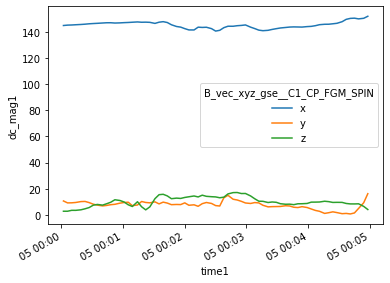

In [7]:
xr_cluster['dc_mag1'].plot.line(x='time1')

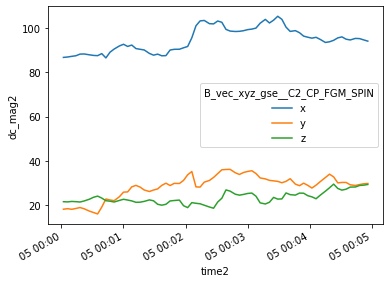

In [8]:
xr_cluster['dc_mag2'].plot.line(x='time2')

## MMS data

Finally, data can be downloaded from Magnetospheric Multiscale Mission (MMS) mission. This mission has also several spacecrafts. For this example, we will download the magnetic field during 1 minute on April 8, 2018 for the probe 1 and 2 in GSE coordinate system.

In [9]:
start_time_mms = datetime(2018, 4, 8, 0, 0, 0)
end_time_mms = datetime(2018, 4, 8, 0, 1, 0)

settings_mms = {'prod': ['dc_mag'], 'mode': 'low_res', 'probes': ['1', '2'], 'coords': 'gse'}

In [10]:
xr_mms = load_data(mission='mms', start_time=start_time_mms, end_time=end_time_mms, **settings_mms)

/home/rdupuis/miniconda3/envs/notebooks_aidapy/lib/python3.7/site-packages/heliopy/data/util.py:577: UserWarning: The CDF provided units ('hours') for key 'mms1_mec_mlt' are unknown
  warnings.warn(message)
/home/rdupuis/miniconda3/envs/notebooks_aidapy/lib/python3.7/site-packages/heliopy/data/util.py:577: UserWarning: The CDF provided units ('hours') for key 'mms2_mec_mlt' are unknown
  warnings.warn(message)


In [11]:
print(xr_mms)

<xarray.Dataset>
Dimensions:                 (mms1_fgm_b_gse_srvy_l2: 4, mms2_fgm_b_gse_srvy_l2: 4, time1: 849, time2: 872)
Coordinates:
  * mms1_fgm_b_gse_srvy_l2  (mms1_fgm_b_gse_srvy_l2) <U3 'x' 'y' 'z' 'tot'
  * time1                   (time1) datetime64[ns] 2018-04-08T00:00:06.987911...
  * mms2_fgm_b_gse_srvy_l2  (mms2_fgm_b_gse_srvy_l2) <U3 'x' 'y' 'z' 'tot'
  * time2                   (time2) datetime64[ns] 2018-04-08T00:00:05.530724...
Data variables:
    dc_mag1                 (time1, mms1_fgm_b_gse_srvy_l2) float32 1.712529 ...
    dc_mag2                 (time2, mms2_fgm_b_gse_srvy_l2) float32 1.8213952...
Attributes:
    mission:        mms
    load_settings:  {'prod': ['dc_mag'], 'mode': 'low_res', 'probes': ['1', '...


<xarray.DataArray 'dc_mag1' (time1: 849, mms1_fgm_b_gse_srvy_l2: 4)>
array([[ 1.712529 ,  2.0734146, -1.2255336,  2.9552896],
       [ 1.7148426,  2.0649228, -1.2076592,  2.943303 ],
       [ 1.7108021,  2.0773492, -1.215393 ,  2.9528635],
       ...,
       [ 2.291496 ,  1.6105053, -1.0825931,  3.0027802],
       [ 2.281956 ,  1.6153009, -1.0897213,  3.0006688],
       [ 2.2774348,  1.6054558, -1.1059315,  2.9978797]], dtype=float32)
Coordinates:
  * mms1_fgm_b_gse_srvy_l2  (mms1_fgm_b_gse_srvy_l2) <U3 'x' 'y' 'z' 'tot'
  * time1                   (time1) datetime64[ns] 2018-04-08T00:00:06.987911...
Attributes:
    Units:    {'mms1_fgm_b_gse_srvy_l2': 'nT'}
    pos_gse:  <xarray.DataArray 'mms1_mec_r_gse' (time: 3, mms1_mec_r_gse: 3)...


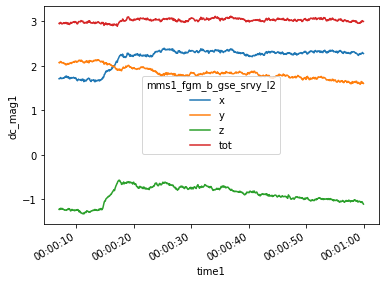

In [12]:
xr_mms['dc_mag1'].plot.line(x='time1')
print(xr_mms['dc_mag1'])

In [13]:
settings_mms_dist = {'prod': ['i_dist'], 'probes': ['1'], 'coords': 'gse'}
xr_mms_dist = load_data(mission='mms', start_time=start_time_mms, end_time=end_time_mms, **settings_mms_dist)

/home/rdupuis/miniconda3/envs/notebooks_aidapy/lib/python3.7/site-packages/heliopy/data/util.py:577: UserWarning: The CDF provided units ('hours') for key 'mms1_mec_mlt' are unknown
  warnings.warn(message)


In [14]:
print(xr_mms_dist['i_dist1'])

<xarray.DataArray 'i_dist1' (time1: 14, mms1_dis_energy_fast: 32, mms1_dis_theta_fast: 16, mms1_dis_phi_fast: 32)>
array([[[[0.0000000e+00, 0.0000000e+00, 0.0000000e+00, ...,
          0.0000000e+00, 0.0000000e+00, 0.0000000e+00],
         [0.0000000e+00, 0.0000000e+00, 0.0000000e+00, ...,
          0.0000000e+00, 0.0000000e+00, 0.0000000e+00],
         [0.0000000e+00, 0.0000000e+00, 8.8600778e-22, ...,
          0.0000000e+00, 0.0000000e+00, 0.0000000e+00],
         ...,
         [9.4683059e-21, 0.0000000e+00, 0.0000000e+00, ...,
          0.0000000e+00, 3.6260056e-28, 0.0000000e+00],
         [9.3742876e-21, 0.0000000e+00, 9.1155687e-22, ...,
          0.0000000e+00, 0.0000000e+00, 0.0000000e+00],
         [0.0000000e+00, 0.0000000e+00, 0.0000000e+00, ...,
          0.0000000e+00, 0.0000000e+00, 0.0000000e+00]],

        [[0.0000000e+00, 2.7807286e-21, 0.0000000e+00, ...,
          0.0000000e+00, 0.0000000e+00, 0.0000000e+00],
         [0.0000000e+00, 2.8024641e-21, 0.0000000e+00, ..